In [208]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
#from matplotlib import pyplot as plt
#import seaborn as sn
#%matplotlib inline 

In [309]:
import numpy as np
from sklearn.decomposition import PCA

In [311]:
from google.colab import files 
uploaded=files.upload()

Saving wine.csv to wine (3).csv


In [312]:
wine =pd.read_csv('wine.csv')
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [314]:
pca = PCA(n_components=3)

In [315]:
pca.fit(data)

PCA(n_components=3)

In [316]:
transformed_data = pca.transform(data)

In [317]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.54512679 0.33669915 0.11817405]


In [318]:
print("Principal Components:")

Principal Components:


In [319]:
print(pca.components_)

[[-0.35639682 -0.21777714 -0.90860025]
 [-0.00633203 -0.97187164  0.23542602]
 [-0.93431323  0.08965837  0.34499299]]


In [209]:
from google.colab import files 
uploaded=files.upload()

Saving wine.csv to wine.csv


In [210]:
wine =pd.read_csv('wine.csv')
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [255]:

wine = wine.drop('Magnesium', axis=1)
wine = wine.drop('Phenols', axis=1)
wine = wine.drop('Flavanoids', axis=1)
wine = wine.drop('Nonflavanoids', axis=1)
wine = wine.drop('Proanthocyanins', axis=1)
wine = wine.drop('Color', axis=1)
wine = wine.drop('Hue', axis=1)
wine = wine.drop('Dilution', axis=1)
wine = wine.drop('Proline', axis=1)

In [257]:
wine

,Type,Alcohol,Malic,Ash
0,1,14.23,1.71,2.43
1,1,13.20,1.78,2.14
2,1,13.16,2.36,2.67
3,1,14.37,1.95,2.50
4,1,13.24,2.59,2.87
...,...,...,...,...
173,3,13.71,5.65,2.45
174,3,13.40,3.91,2.48
175,3,13.27,4.28,2.26
176,3,13.17,2.59,2.37


In [258]:

def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [259]:

df_norm = minmax_func(wine.iloc[:,1:])

In [260]:
df_norm

,Alcohol,Malic,Ash
0,0.842105,0.191700,0.572193
1,0.571053,0.205534,0.417112
2,0.560526,0.320158,0.700535
3,0.878947,0.239130,0.609626
4,0.581579,0.365613,0.807487
...,...,...,...
173,0.705263,0.970356,0.582888
174,0.623684,0.626482,0.598930
175,0.589474,0.699605,0.481283
176,0.563158,0.365613,0.540107


In [261]:
#help(sch.dendrogram)

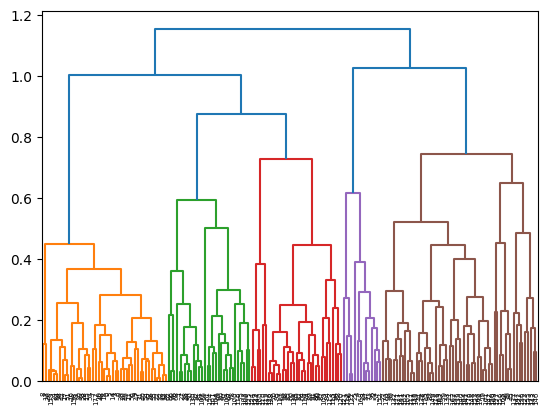

In [262]:

dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))
#methods : 'single','complete','centroid','average'

In [263]:

hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [264]:

y_hc = hc.fit_predict(df_norm)
y_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1,
       1, 1])

In [265]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [266]:
Clusters

,Clusters
0,0
1,0
2,2
3,0
4,2
...,...
173,1
174,1
175,1
176,1


In [267]:
Clusters.value_counts()

Clusters
0           108
1            56
2            14
dtype: int64

In [268]:
y_hc

array([0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1,
       1, 1])

In [269]:
wine['h_clusterid'] = y_hc
wine

,Type,Alcohol,Malic,Ash,h_clusterid
0,1,14.23,1.71,2.43,0
1,1,13.20,1.78,2.14,0
2,1,13.16,2.36,2.67,2
3,1,14.37,1.95,2.50,0
4,1,13.24,2.59,2.87,2
...,...,...,...,...,...
173,3,13.71,5.65,2.45,1
174,3,13.40,3.91,2.48,1
175,3,13.27,4.28,2.26,1
176,3,13.17,2.59,2.37,1


In [270]:
wine.groupby('h_clusterid').mean()

,Type,Alcohol,Malic,Ash
h_clusterid,,,,
0,1.657407,12.978889,1.710556,2.293889
1,2.553571,13.104821,3.609643,2.400714
2,1.642857,12.751429,2.070714,2.790000


In [271]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [272]:
from google.colab import files 
uploaded=files.upload()

Saving wine.csv to wine (2).csv


In [280]:
wine =pd.read_csv('wine.csv')
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [281]:

wine = wine.drop('Magnesium', axis=1)
wine = wine.drop('Phenols', axis=1)
wine = wine.drop('Flavanoids', axis=1)
wine = wine.drop('Nonflavanoids', axis=1)
wine = wine.drop('Proanthocyanins', axis=1)
wine = wine.drop('Color', axis=1)
wine = wine.drop('Hue', axis=1)
wine = wine.drop('Dilution', axis=1)
wine = wine.drop('Proline', axis=1)


In [276]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity
0,1,14.23,1.71,2.43,15.6
1,1,13.20,1.78,2.14,11.2
2,1,13.16,2.36,2.67,18.6
3,1,14.37,1.95,2.50,16.8
4,1,13.24,2.59,2.87,21.0
...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5
174,3,13.40,3.91,2.48,23.0
175,3,13.27,4.28,2.26,20.0
176,3,13.17,2.59,2.37,20.0


In [283]:
wine

,Type,Alcohol,Malic,Ash
0,1,14.23,1.71,2.43
1,1,13.20,1.78,2.14
2,1,13.16,2.36,2.67
3,1,14.37,1.95,2.50
4,1,13.24,2.59,2.87
...,...,...,...,...
173,3,13.71,5.65,2.45
174,3,13.40,3.91,2.48
175,3,13.27,4.28,2.26
176,3,13.17,2.59,2.37


In [285]:
def minmax_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return (x)

In [286]:
def norm_func(i):
  x = (i-i.mean())/(i.std())
  return(x)

In [295]:
x=norm_func(wine.iloc[:,1:])
x

,Alcohol,Malic,Ash
0,1.514341,-0.560668,0.231400
1,0.245597,-0.498009,-0.825667
2,0.196325,0.021172,1.106214
3,1.686791,-0.345835,0.486554
4,0.294868,0.227053,1.835226
...,...,...,...
173,0.873810,2.966176,0.304301
174,0.491955,1.408636,0.413653
175,0.331822,1.739837,-0.388260
176,0.208643,0.227053,0.012696


In [296]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_wine_df = scaler.fit_transform(wine.iloc[:,1:])

In [297]:
scaled_wine_df

array([[ 1.51861254, -0.5622498 ,  0.23205254],
       [ 0.24628963, -0.49941338, -0.82799632],
       [ 0.19687903,  0.02123125,  1.10933436],
       [ 1.69154964, -0.34681064,  0.4879264 ],
       [ 0.29570023,  0.22769377,  1.84040254],
       [ 1.48155459, -0.51736664,  0.30515936],
       [ 1.71625494, -0.4186237 ,  0.30515936],
       [ 1.3086175 , -0.16727801,  0.89001391],
       [ 2.25977152, -0.62508622, -0.7183361 ],
       [ 1.0615645 , -0.88540853, -0.352802  ],
       [ 1.3580281 , -0.15830138, -0.24314178],
       [ 1.38273339, -0.76871232, -0.17003496],
       [ 0.92568536, -0.54429654,  0.15894572],
       [ 2.16095032, -0.54429654,  0.0858389 ],
       [ 1.70390229, -0.4186237 ,  0.0492855 ],
       [ 0.77745356, -0.47248348,  1.21899459],
       [ 1.60508109, -0.37374054,  1.29210141],
       [ 1.02450655, -0.68792264,  0.92656731],
       [ 1.46920194, -0.66996938,  0.41481959],
       [ 0.78980621,  0.68550197,  0.70724686],
       [ 1.3086175 , -0.63406285, -0.316

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[245.0, 103.85073935914485, 68.3425787866274, 50.332525352696194, 43.986769492079716, 38.82656751546527, 33.3926774093108, 29.027672094835182, 26.5918912501165, 22.66225709240708]


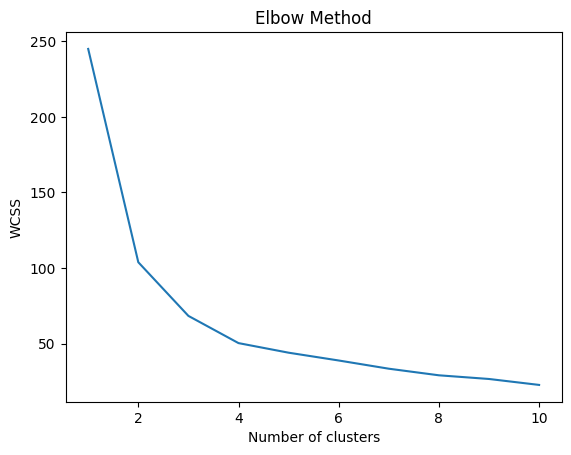

In [290]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

print(wcss)    
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [298]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=0)
clusters_new.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [299]:
clusters_new.labels_

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1,
       0, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1,
       2, 1], dtype=int32)

In [300]:
wine['clusterid_new'] = clusters_new.labels_

In [301]:
wine

,Type,Alcohol,Malic,Ash,clusterid_new
0,1,14.23,1.71,2.43,2
1,1,13.20,1.78,2.14,0
2,1,13.16,2.36,2.67,2
3,1,14.37,1.95,2.50,2
4,1,13.24,2.59,2.87,2
...,...,...,...,...,...
173,3,13.71,5.65,2.45,1
174,3,13.40,3.91,2.48,1
175,3,13.27,4.28,2.26,1
176,3,13.17,2.59,2.37,2


In [302]:

clusters_new.cluster_centers_

array([[-0.86495005, -0.56603905, -0.63716561],
       [ 0.14705361,  1.39073277,  0.25342202],
       [ 0.89146551, -0.45220732,  0.54062226]])

In [303]:
wine.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Type,Alcohol,Malic,Ash
,,mean,mean,mean,mean
0,0,2.028571,12.298429,1.704000,2.191714
1,1,2.541667,13.120000,3.890000,2.436042
2,2,1.350000,13.724333,1.831167,2.514833


In [304]:
wine

,Type,Alcohol,Malic,Ash,clusterid_new
0,1,14.23,1.71,2.43,2
1,1,13.20,1.78,2.14,0
2,1,13.16,2.36,2.67,2
3,1,14.37,1.95,2.50,2
4,1,13.24,2.59,2.87,2
...,...,...,...,...,...
173,3,13.71,5.65,2.45,1
174,3,13.40,3.91,2.48,1
175,3,13.27,4.28,2.26,1
176,3,13.17,2.59,2.37,2


In [305]:
wine['clusterid_new']=wine['clusterid_new'].replace(0, 'Cluster 1')
wine['clusterid_new']=wine['clusterid_new'].replace(1, 'Cluster 2')
wine['clusterid_new']=wine['clusterid_new'].replace(2, 'Cluster 3')
wine['clusterid_new']=wine['clusterid_new'].replace(3, 'Cluster 4')
wine

,Type,Alcohol,Malic,Ash,clusterid_new
0,1,14.23,1.71,2.43,Cluster 3
1,1,13.20,1.78,2.14,Cluster 1
2,1,13.16,2.36,2.67,Cluster 3
3,1,14.37,1.95,2.50,Cluster 3
4,1,13.24,2.59,2.87,Cluster 3
...,...,...,...,...,...
173,3,13.71,5.65,2.45,Cluster 2
174,3,13.40,3.91,2.48,Cluster 2
175,3,13.27,4.28,2.26,Cluster 2
176,3,13.17,2.59,2.37,Cluster 3


In [307]:
wine.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'clusterid_new'], dtype='object')

In [306]:
wine['clusterid_new'].value_counts()

Cluster 1    70
Cluster 3    60
Cluster 2    48
Name: clusterid_new, dtype: int64